# Problem # 2

## Image Subtraction for Tamper Detection

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [29]:


def mse(imageA, imageB):
    
    # the "Mean Squared Error" between the two images is the
    # sum of the squared difference between the two images;
   
    
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err


# Defining the function to shift images in one of the 8 directions

def shift(im_temp, im_real, i, typ):
    if typ == 'hr':
        img_s = np.zeros_like(im_temp)
        img_s[:,i+1:] = im_temp[:,:-(i+1)]
    if typ == 'hl':
        img_s = np.zeros_like(im_temp)
        img_s[:,:-(i+1)] = im_temp[:,i+1:]
    if typ == 'vu':
        img_s = np.zeros_like(im_temp)
        img_s[:-(i+1),:] = im_temp[i+1:,:]
        
    if typ == 'vd':
        img_s = np.zeros_like(im_temp)
        img_s[i+1:,:] = im_temp[:-(i+1),:]
        
    if typ == 'ul':
        img_s = np.zeros_like(im_temp)
        img_s[i+1:,i+1:] = im_temp[:-(i+1),:-(i+1)]
        
    if typ == 'ur':
        img_s = np.zeros_like(im_temp)
        img_s[i+1:,:-(i+1)] = im_temp[:-(i+1),i+1:]
        
    if typ == 'll':
        img_s = np.zeros_like(im_temp)
        img_s[:-(i+1),i+1:] = im_temp[i+1:,:-(i+1)]

    if typ == 'lr':
        img_s = np.zeros_like(im_temp)
        img_s[:-(i+1),:-(i+1)] = im_temp[i+1:,i+1:]
        
    return mse(im_real, img_s), img_s

# Defining function for finding the minimum error index and the direction of shift 

def MSD(im_temp, im_real):
    error = {'hr': [], 'hl': [], 'vu': [], 'vd': [], 'ul': [], 'ur': [], 'll': [], 'lr': []}

    for i in range(50):

        #Horizontal Right Shift
        e, _ = shift(im_temp, im_real, i, 'hr')
        error['hr'].append(e)

        #Horizontal Left Shift
        e, _ = shift(im_temp, im_real, i, 'hl')
        error['hl'].append(e)

        #Vertical Up Shift
        e, _ = shift(im_temp, im_real, i, 'vu')
        error['vu'].append(e)

        #Vertical Down Shift
        e, _ = shift(im_temp, im_real, i, 'vd')
        error['vd'].append(e)

        #Upper Left Shift
        e, _ = shift(im_temp, im_real, i, 'ul')
        error['ul'].append(e)

        #Upper Right Shift
        e, _ = shift(im_temp, im_real, i, 'ur')
        error['ur'].append(e)

        #Lower Left Shift
        e, _ = shift(im_temp, im_real, i, 'll')
        error['ll'].append(e)

        #Lower Right Shift
        e, _ = shift(im_temp, im_real, i, 'lr')
        error['lr'].append(e)

    mini = {'hr': [], 'hl': [], 'vu': [], 'vd': [], 'ul': [], 'ur': [], 'll': [], 'lr': []}

    mini['hr'].append(min(error['hr']))
    mini['hr'].append(error['hr'].index(min(error['hr'])))

    mini['hl'].append(min(error['hl']))
    mini['hl'].append(error['hl'].index(min(error['hl'])))

    mini['vu'].append(min(error['vu']))
    mini['vu'].append(error['vu'].index(min(error['vu'])))

    mini['vd'].append(min(error['vd']))
    mini['vd'].append(error['vd'].index(min(error['vd'])))

    mini['ul'].append(min(error['ul']))
    mini['ul'].append(error['ul'].index(min(error['ul'])))

    mini['ur'].append(min(error['ur']))
    mini['ur'].append(error['ur'].index(min(error['ur'])))

    mini['ll'].append(min(error['ll']))
    mini['ll'].append(error['ll'].index(min(error['ll'])))

    mini['lr'].append(min(error['lr']))
    mini['lr'].append(error['lr'].index(min(error['lr'])))

    min_e = min([mini['hr'][0], mini['hl'][0], mini['vu'][0], mini['vd'][0], mini['ul'][0], mini['ur'][0], mini['ll'][0], mini['lr'][0]])

    for key, value in mini.items():

        if min_e == value[0]:

            found_key = key
            found_value = value
            break
    return found_value[1], found_key

Text(0.5, 1.0, 'Reference Image 2')

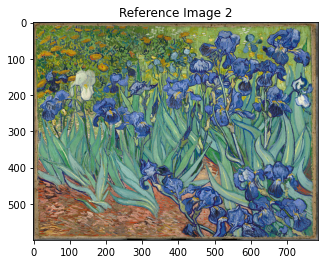

In [30]:
# Processing image 1

im_real1 = plt.imread("p1R.jpg")
plt.imshow(im_real1)
plt.title('Reference Image 2')

Text(0.5, 1.0, 'Tempered Image 1')

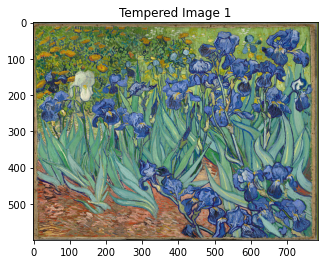

In [31]:
im_temp1 = plt.imread('p1T.jpg')
plt.imshow(im_temp1)
plt.title('Tempered Image 1')

Value of pixel shift: 1
Type of shift: ll


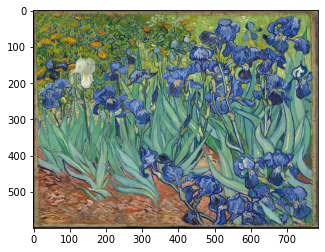

In [33]:
shift_index, typ = MSD(im_temp1, im_real1)

print("Value of pixel shift:", shift_index)
print("Type of shift:", typ)

_, img_s1 = shift(im_temp1, im_real1, shift_index, typ)

plt.imshow(img_s1)

Text(0.5, 1.0, 'Binary Image')

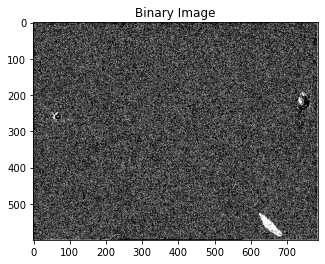

In [34]:
subtracted_img1 = im_real1 - img_s1

gray = cv2.cvtColor(subtracted_img1, cv2.COLOR_BGR2GRAY)

ret, bw_img = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.imshow(bw_img, cmap = 'gray')
plt.title('Binary Image')

Text(0.5, 1.0, 'Reference Image 2')

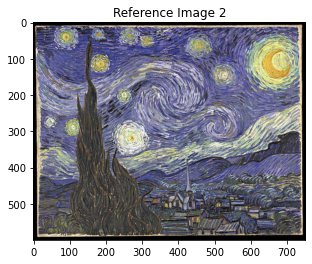

In [35]:
# Processing image 2

im_real2 = plt.imread("p2R.jpg")
plt.imshow(im_real2)
plt.title('Reference Image 2')

Text(0.5, 1.0, 'Tempered Image 1')

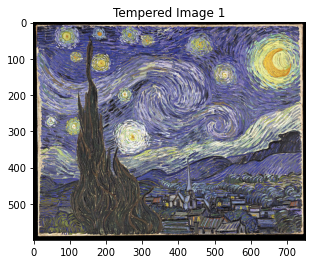

In [39]:
im_temp2 = plt.imread('p2T.jpg')
plt.imshow(im_temp2)
plt.title('Tempered Image 1')

Value of pixel shift: 1
Type of shift: ur


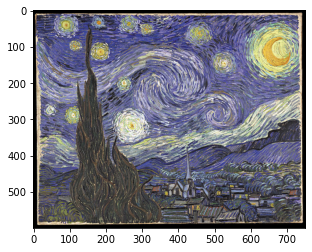

In [40]:
shift_index, typ = MSD(im_temp2, im_real2)

print("Value of pixel shift:", shift_index)
print("Type of shift:", typ)

_, img_s2 = shift(im_temp2, im_real2, shift_index, typ)

plt.imshow(img_s2)

Text(0.5, 1.0, 'Binary Image')

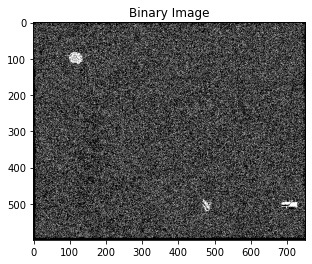

In [41]:
subtracted_img2 = im_real2 - img_s2

gray = cv2.cvtColor(subtracted_img2, cv2.COLOR_BGR2GRAY)

ret, bw_img = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.imshow(bw_img, cmap = 'gray')
plt.title('Binary Image')

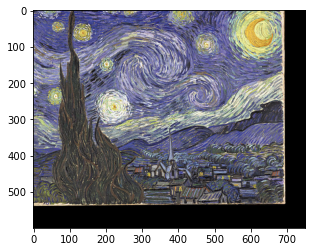

In [42]:
#Just to demonstrate the shifting of images

img2 = np.zeros_like(im_temp2)
img2[:-50,:-50]= im_temp[50:,50:]
plt.imshow(img2)

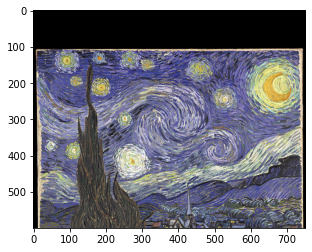

In [43]:
img3 = np.zeros_like(im_temp2)
img3[100:,:] = im_temp[:-100,:]
plt.imshow(img3)

# End